# Import

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import os, sys, warnings
warnings.filterwarnings("ignore")
sys.path.append('..')

from Class.Plotter import *

# Inputs

In [2]:
targets = ['Cases']
target = 'Cases'
result_folder =  '../results/total_target_cleaned_scaled_2/' # '../results_cleaned_moving_averaged/short' # 
figPath = os.path.join(result_folder, 'figures_best')
results = pd.read_csv(os.path.join(figPath, 'predictions_case_death.csv'))
results['Date'] = pd.to_datetime(results['Date'])
results.head()

,FIPS,TimeFromStart,Predicted_Cases,Predicted_Deaths,Cases,Deaths,Date,split
0,10001,13,9.0,0.0,0.0,0.0,2020-03-13,train
1,10003,13,36.0,0.0,0.0,0.0,2020-03-13,train
2,10005,13,15.0,0.0,0.0,0.0,2020-03-13,train
3,1001,13,3.0,0.0,0.0,0.0,2020-03-13,train
4,1003,13,8.0,0.0,0.0,0.0,2020-03-13,train


In [ ]:
# first_date = pd.to_datetime('02-29-2020')
# # last_date = to_datetime('05-17-2022')
# last_date = pd.to_datetime('12-29-2021')

# results = results[(first_date <= results['Date']) & (results['Date']<= last_date)]
# results.to_csv(os.path.join(figPath, 'predictions_case_death.csv'), index=False)

In [3]:
support_path = '../dataset_raw/Support files/'
population_filepath = os.path.join(support_path, 'Population.csv')
population = pd.read_csv(population_filepath)
sorted_fips = population.sort_values(by=['Population'], ascending=False)['FIPS'].values

In [4]:
results_top_500 = results[results['FIPS'].isin(sorted_fips[:500])]
results_bottom_500 = results[results['FIPS'].isin(sorted_fips[-500:])]
test = results[results['split']=='test']
train = results[results['split']=='train']

| Rurality cut | RuralityRange | MADRange|
|:---:|:---:|:---:|
| 1 | [3.501, 4.5] | [1, 2] |
| 2 | [4.501, 5.5] | [1, 2] |
| 3 | [3.501, 5.5] | [2, 3] |

In [ ]:
rurality_filepath = os.path.join(support_path, 'Rurality_Median_Mad.csv')
rurality = pd.read_csv(rurality_filepath, encoding = 'latin1')

In [ ]:
def get_rurality_cut(rurality, rurality_range, madrange):
    # do the median first
    locs = rurality[(rurality['Median'] > rurality_range[0]) & (rurality['Median'] <= rurality_range[1])].FIPS
    rurality = rurality[rurality['FIPS'].isin(locs)]

    # then mad
    locs = rurality[(rurality['MAD'] >= madrange[0]) & (rurality['MAD'] < madrange[1])].FIPS
    print(f'Number of locations {len(locs)}')
    return locs

In [ ]:
locs = get_rurality_cut(rurality, [3.501, 4.5], [1, 2])
rurality_cut_1 = results[results['FIPS'].isin(locs)]

locs = get_rurality_cut(rurality, [4.501, 5], [1, 2])
rurality_cut_2 = results[results['FIPS'].isin(locs)]

locs = get_rurality_cut(rurality, [3.501, 5], [2, 3])
rurality_cut_3 = results[results['FIPS'].isin(locs)]

# Plots

In [5]:
plotter = PlotResults(figPath, targets, figsize=(11,6.5))

## All

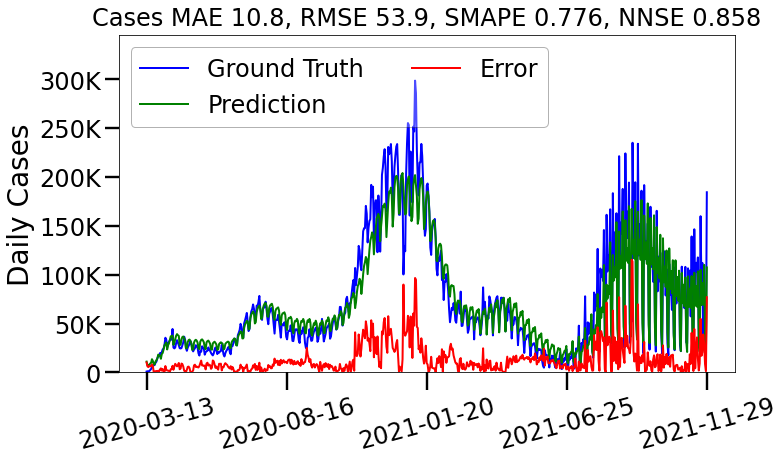

[<Figure size 792x468 with 1 Axes>]

In [9]:
plotter.summed_plot(train, type='Train', save=False, plot_error=True)

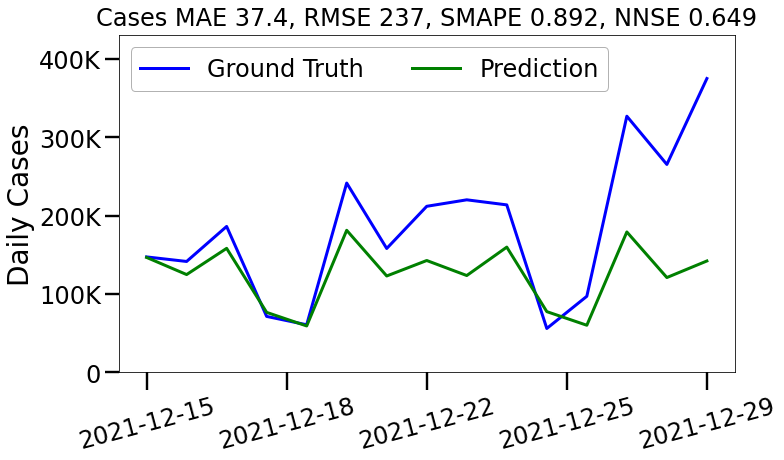

[<Figure size 792x468 with 1 Axes>]

In [13]:
plotter.summed_plot(test, type='Test', save=True)

## Population cut

### Train results

In [ ]:
# plotter.summed_plot(results_top_500[results_top_500['split']=='train'], type='Train', save=False)
# plotter.summed_plot(results_bottom_500[results_bottom_500['split']=='train'], type='Train', save=False)

### Test results

In [ ]:
# figures = plotter.summed_plot(results_top_500[results_top_500['split']=='test'], type='Test', save=True)
# for index, target in enumerate(targets):
#     figures[index].savefig(os.path.join(figPath, f'{target}_top_500_Test.jpg') , dpi=DPI)

# figures = plotter.summed_plot(results_bottom_500[results_bottom_500['split']=='test'], type='Test', save=True)
# for index, target in enumerate(targets):
#     figures[index].savefig(os.path.join(figPath, f'{target}_bottom_500_Test.jpg') , dpi=DPI)

## Rurality cut

### Train result

In [ ]:
# plotter.summed_plot(rurality_cut_1[rurality_cut_1['split']=='train'], type='Train', save=False)
# plotter.summed_plot(rurality_cut_2[rurality_cut_2['split']=='train'], type='Train', save=False)
# plotter.summed_plot(rurality_cut_3[rurality_cut_3['split']=='train'], type='Train', save=False)

### Test results

In [ ]:
# figures = plotter.summed_plot(rurality_cut_1[rurality_cut_1['split']=='test'], type='Test', save=False)
# for index, target in enumerate(targets):
#     figures[index].savefig(os.path.join(figPath, f'{target}_rurality_cut_1_Test.jpg') , dpi=DPI)

# figures = plotter.summed_plot(rurality_cut_2[rurality_cut_2['split']=='test'], type='Test', save=False)
# for index, target in enumerate(targets):
#     figures[index].savefig(os.path.join(figPath, f'{target}_rurality_cut_2_Test.jpg') , dpi=DPI)

# figures = plotter.summed_plot(rurality_cut_3[rurality_cut_3['split']=='test'], type='Test', save=False)
# for index, target in enumerate(targets):
#     figures[index].savefig(os.path.join(figPath, f'{target}_rurality_cut_3_Test.jpg') , dpi=DPI)

# Counties

## Randomly selected counties

In [6]:
# random choice 
np.random.seed(7)
top = np.random.choice(sorted_fips[:100], size=3, replace=False)
bottom = np.random.choice(sorted_fips[100:], size=3, replace=False)

selected_fips = np.concatenate((top, bottom), axis=None)

# for fips in selected_fips:
#     [state, county] = population[population['FIPS']==fips][['STATE','COUNTY']].values[0]
#     print(fips, state, county)
#     figures = plotter.summed_plot(test[test['FIPS']==fips], type='Test', save=False)
#     for index, target in enumerate(targets):
#         figures[index].savefig(os.path.join(figPath, f'{target}_{state}_{county}_Test.jpg') , dpi=DPI)

In [7]:
selected_population = []
for fips in selected_fips:
    selected_population.append(population[population['FIPS']==fips]['Population'].values[0])
selected_population

[1153526, 1471968, 803907, 16126, 18069, 20938]

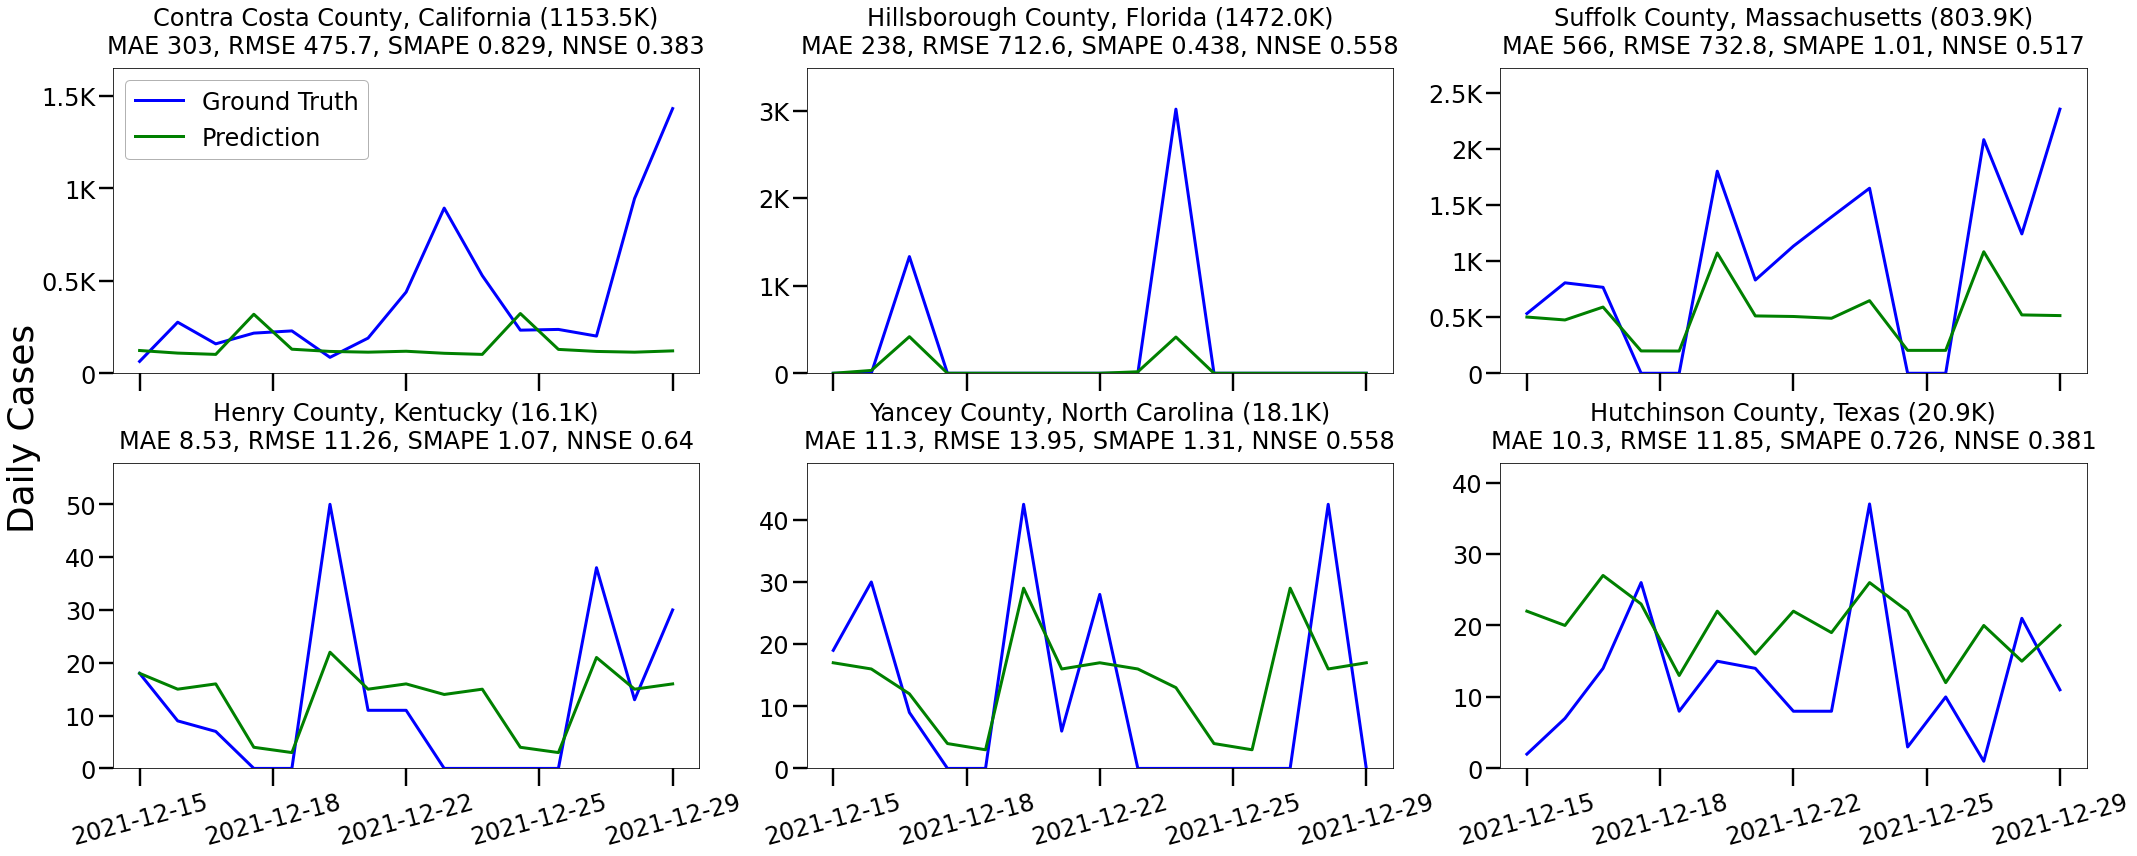

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 12), sharex=True)
x_column = 'Date'

for index in range(6):
    row, col = index // 3, index%3
    ax = axes[row][col]

    fips = selected_fips[index]
    df = test[test['FIPS']==fips]
    [state, county] = population[population['FIPS']==fips][['State','County']].values[0]
    mae, rmse, smape, nnse = calculate_result(df[target], df[f'Predicted_{target}'])
    title = f'{county}, {state} ({(selected_population[index]/1e3).round(1)}K)\nMAE {mae:0.3g}, RMSE {rmse:0.4g}, SMAPE {smape:0.3g}, NNSE {nnse:0.3g}'

    ax.set_title(title)
    
    ax.plot(df[x_column], df[target], color='blue', label='Ground Truth')
    ax.plot(df[x_column], df[f'Predicted_{target}'], color='green', label='Prediction')

    _, y_max = ax.get_ylim()
    ax.set_ylim(0, y_max*1.1)

    x_first_tick = df[x_column].min()
    x_last_tick = df[x_column].max()
    x_major_ticks = DATE_TICKS
    ax.set_xticks(
        [x_first_tick + (x_last_tick - x_first_tick) * i / (x_major_ticks - 1) for i in range(x_major_ticks)]
    )

    for tick in ax.get_xticklabels():
        tick.set_rotation(15)
    if y_max>1e3:
        label_text = [] 
        for loc in ax.get_yticks():
            if loc == 0:
                label_text.append('0')
            else:
                label_text.append(f'{loc/1e3:0.5g}K') 

        ax.set_yticklabels(label_text)
    
    if index==0:
        ax.legend(loc='upper left', framealpha=0.3, edgecolor="black")

# fig.legend(
#     labels=['Ground Truth', 'Prediction'], loc='upper left', bbox_to_anchor=(0.39, 0), 
#     ncol=2, bbox_transform=fig.transFigure, edgecolor="black"
# )
fig.supylabel('Daily Cases', x=0.01)
fig.tight_layout()
plt.savefig(os.path.join(figPath, 'Individual_counties.jpg'), dpi=DPI, bbox_inches="tight")
plt.show()

## Most populous

In [10]:
top = [6073, 17031, 42101, 36047, 12086, 11001, 6037]
selected_fips = np.concatenate((top[:3], bottom), axis=None)
selected_population = []
for fips in selected_fips:
    selected_population.append(population[population['FIPS']==fips]['Population'].values[0])
selected_population

selected_fips

array([ 6073, 17031, 42101, 21103, 37199, 48233], dtype=int64)

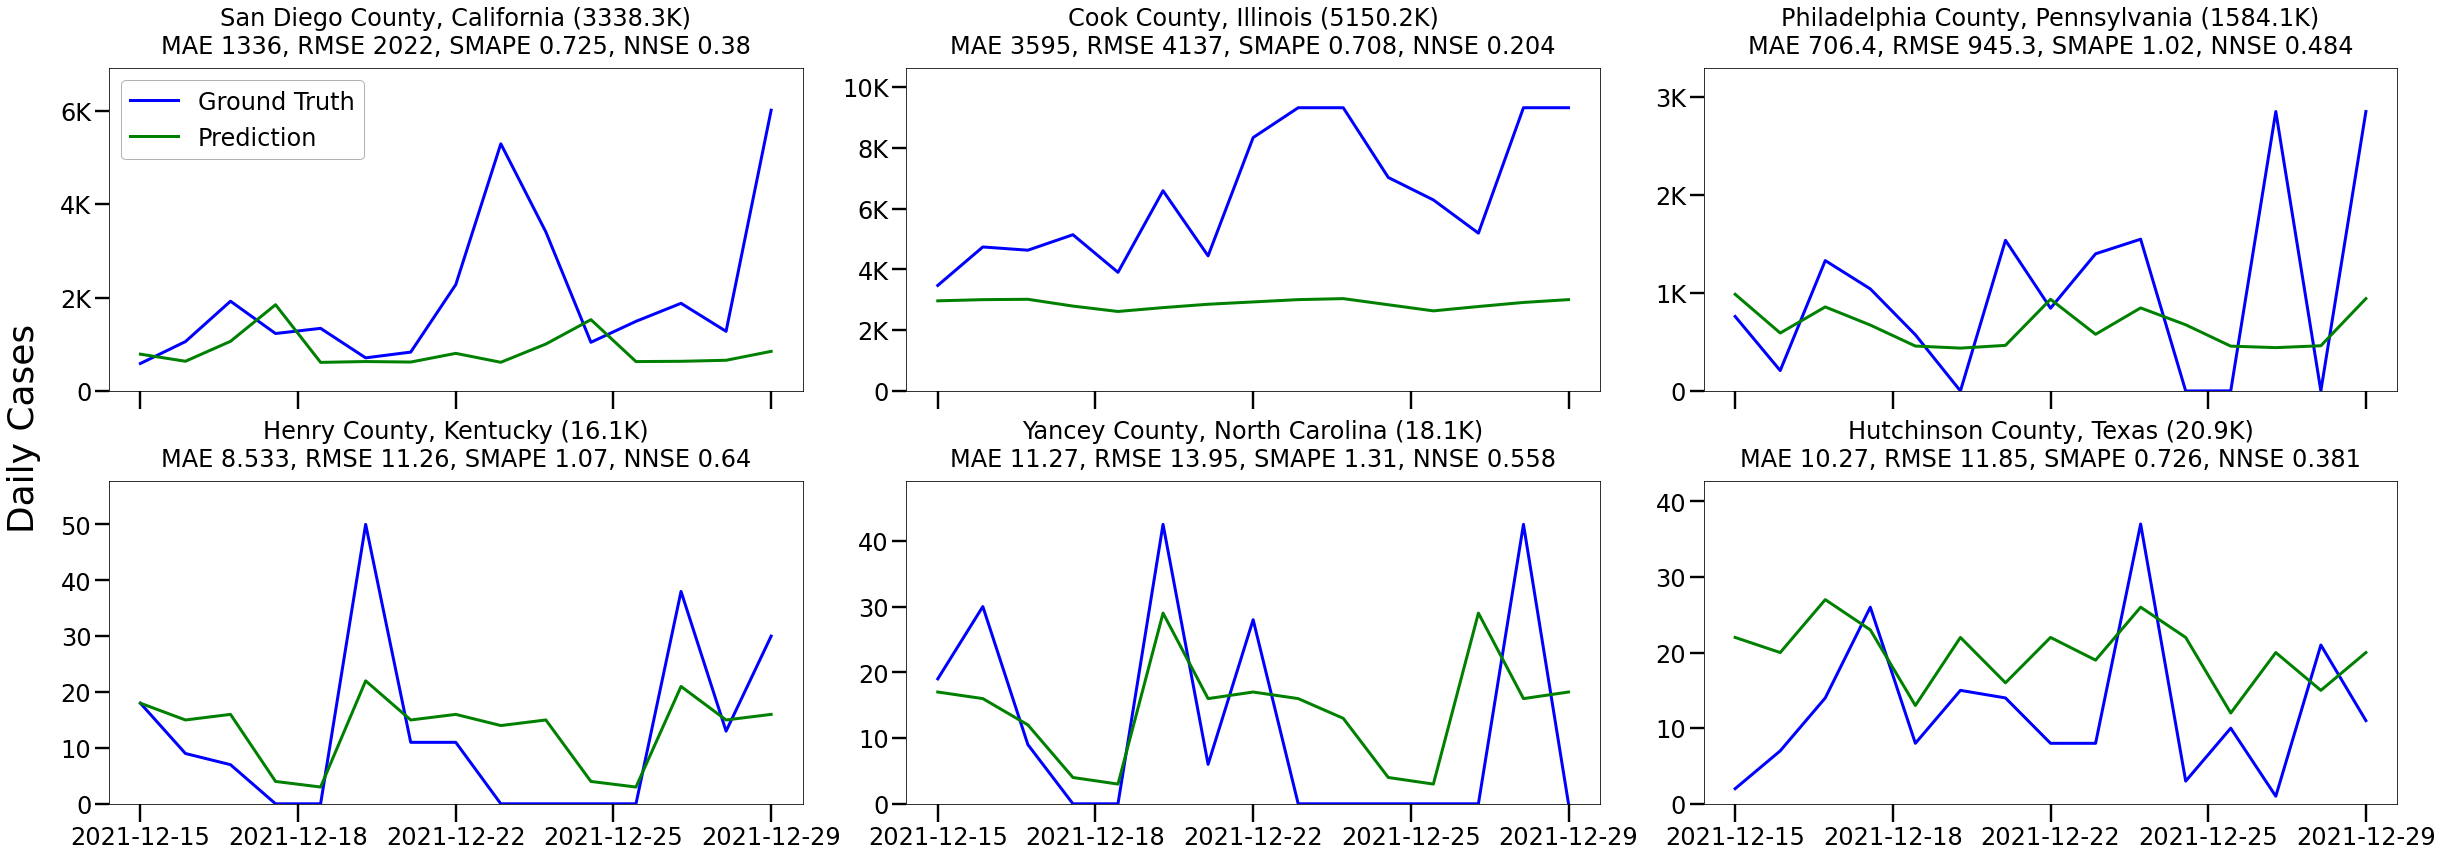

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(34, 12), sharex=True)
x_column = 'Date'

for index in range(6):
    row, col = index // 3, index%3
    ax = axes[row][col]

    fips = selected_fips[index]
    df = test[test['FIPS']==fips]
    [state, county] = population[population['FIPS']==fips][['State','County']].values[0]
    mae, rmse, smape, nnse = calculate_result(df[target], df[f'Predicted_{target}'])
    title = f'{county}, {state} ({(selected_population[index]/1e3).round(1)}K)\nMAE {mae:0.4g}, RMSE {rmse:0.4g}, SMAPE {smape:0.3g}, NNSE {nnse:0.3g}'

    ax.set_title(title)
    
    ax.plot(df[x_column], df[target], color='blue', label='Ground Truth')
    ax.plot(df[x_column], df[f'Predicted_{target}'], color='green', label='Prediction')

    _, y_max = ax.get_ylim()
    ax.set_ylim(0, y_max*1.1)

    x_first_tick = df[x_column].min()
    x_last_tick = df[x_column].max()
    x_major_ticks = DATE_TICKS
    ax.set_xticks(
        [x_first_tick + (x_last_tick - x_first_tick) * i / (x_major_ticks - 1) for i in range(x_major_ticks)]
    )

    # for tick in ax.get_xticklabels():
    #     tick.set_rotation(15)
    if y_max>1e3:
        label_text = [] 
        for loc in ax.get_yticks():
            if loc == 0:
                label_text.append('0')
            else:
                label_text.append(f'{loc/1e3:0.5g}K') 

        ax.set_yticklabels(label_text)
    
    if index==0:
        ax.legend(loc='upper left', framealpha=0.3, edgecolor="black")

# fig.legend(
#     labels=['Ground Truth', 'Prediction'], loc='upper left', bbox_to_anchor=(0.39, 0), 
#     ncol=2, bbox_transform=fig.transFigure, edgecolor="black"
# )
fig.supylabel('Daily Cases', x=0.001)
fig.tight_layout()
plt.savefig(os.path.join(figPath, 'Populous_counties.jpg'), dpi=DPI, bbox_inches="tight")
plt.show()

## Washington state

In [ ]:
selected_fips = population[population['STATE']=='Washington']['FIPS'].values
selected_fips

In [ ]:
fig, axes = plt.subplots(nrows=8, ncols=5, figsize=(36, 30), sharex=True)
x_column = 'Date'
target = 'Cases'

for index in range(39):
    row, col = index // 5, index%5
    ax = axes[row][col]

    fips = selected_fips[index]
    [state, county] = population[population['FIPS']==fips][['State','County']].values[0]
    # mae, rmse, smape, nnse = calculate_result(test[target], test[f'Predicted_{target}'])
    # title = f'{county}, {state} \nRMSE {rmse:0.3g}, SMAPE {smape:0.3g}, NNSE {nnse:0.3g}'
    count = population[population['FIPS']==fips]['Population'].values[0]

    ax.set_title(f'{county}, {state} ({count})')
    df = test[test['FIPS']==fips]

    ax.plot(df[x_column], df[target], color='blue', label='Ground Truth')
    ax.plot(df[x_column], df[f'Predicted_{target}'], color='green', label='Prediction')

    _, y_max = ax.get_ylim()
    ax.set_ylim(0, y_max*1.1)

    x_first_tick = df[x_column].min()
    x_last_tick = df[x_column].max()
    x_major_ticks = DATE_TICKS
    ax.set_xticks(
        [x_first_tick + (x_last_tick - x_first_tick) * i / (x_major_ticks - 1) for i in range(x_major_ticks)]
    )

    for tick in ax.get_xticklabels():
        tick.set_rotation(25)
    if y_max>2e3:
        label_text = [] 
        for loc in ax.get_yticks():
            if loc == 0:
                label_text.append('0')
            else:
                label_text.append(f'{loc/1e3:0.5g}K') 

        ax.set_yticklabels(label_text)
    
    if index==0:
        ax.legend(framealpha=0.3, edgecolor="black")

for index in range(len(selected_fips), 40):
    row, col = index // 5, index%5
    ax = axes[row][col]

    for tick in ax.get_xticklabels():
        tick.set_rotation(25)
    # ax.plot(dates, 0, color='blue', label='Ground Truth')

fig.supylabel('Daily Cases', x=0.01)
fig.tight_layout()
plt.savefig(os.path.join(figPath, 'Washington_counties.jpg'), dpi=DPI)
plt.show()